# Kaggle Titanic Challenge - Data Analysis 
https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
titanic_dframe = pd.read_csv('titanic/train.csv')
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# separate kids by the age of 16
def kid_male_female(person):
    sex, age = person
    if age < 16:
        return 'kid'
    else:
        return sex
        

In [4]:
titanic_dframe['Person'] = titanic_dframe[['Sex','Age']].apply(kid_male_female, axis=1)
titanic_dframe[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,kid
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,kid


## - age of passengers

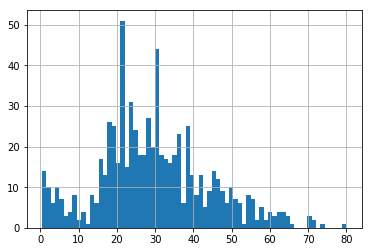

In [5]:
titanic_dframe['Age'].hist(bins=70)

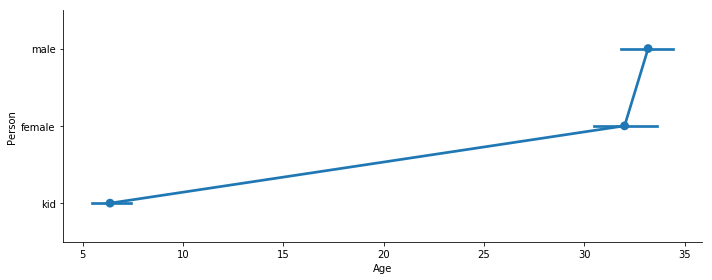

In [6]:
sns.factorplot(y='Person', x='Age', data=titanic_dframe,  aspect=2.5)

## - number of passengers

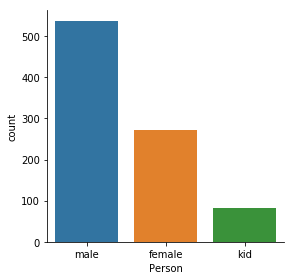

In [7]:
sns.factorplot(x = 'Person', data = titanic_dframe, kind = 'count')

## - number of passengers in each class

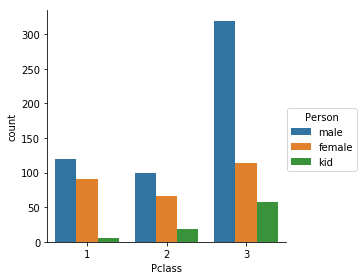

In [8]:
sns.factorplot(x = 'Pclass', data = titanic_dframe, kind = 'count', hue='Person')

## - kernel density estimation for age per person

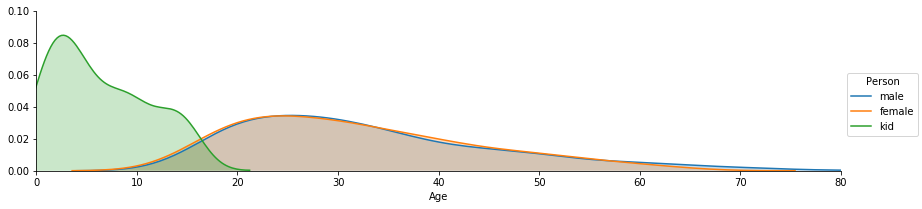

In [9]:
fig = sns.FacetGrid(data=titanic_dframe, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade= True)

fig.set(xlim=(0,titanic_dframe['Age'].max()), ylim=(0,0.1) )
fig.add_legend()

## - kernel density estimation for age per class

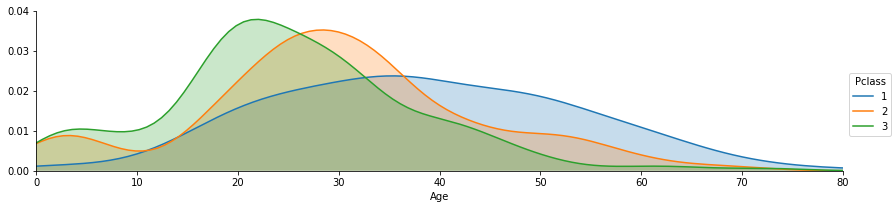

In [10]:
fig = sns.FacetGrid(data=titanic_dframe, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade= True)

fig.set(xlim=(0,titanic_dframe['Age'].max()) , ylim=(0,0.04))
fig.add_legend()

## - number of passengers per desc 

In [11]:
# add the column for desc letter
titanic_dframe['Desc'] = titanic_dframe.Cabin.apply(lambda value: np.nan if pd.isnull(value) else value[0])
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Desc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


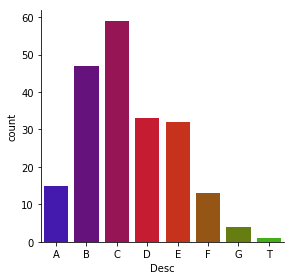

In [12]:
cabins = titanic_dframe['Desc'].dropna()

cabins_df = DataFrame(cabins)
cabins_df.sort_values(by = 'Desc', inplace=True)
sns.factorplot(x = 'Desc', data = cabins_df, kind = 'count', palette='brg')

## - number of passengers in each class per embarked 

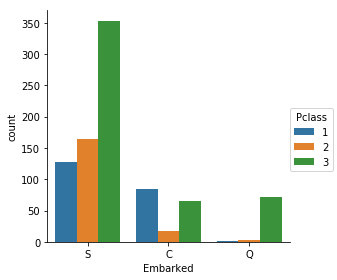

In [13]:
sns.factorplot(x='Embarked', data=titanic_dframe, hue='Pclass', kind='count')

## - check if passenger was with family

In [14]:
titanic_dframe['Alone'] = titanic_dframe.SibSp + titanic_dframe.Parch
titanic_dframe.Alone = titanic_dframe.Alone.apply(lambda value: 'with family' if value > 0 else 'alone')

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Desc,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,alone


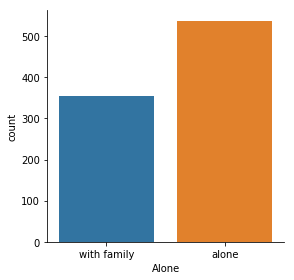

In [15]:
sns.factorplot(x='Alone', data=titanic_dframe, kind='count')

# what factors helped to survive 

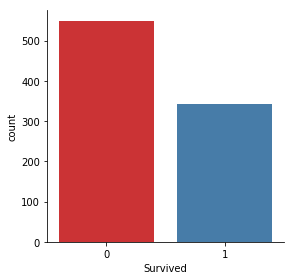

In [16]:
sns.factorplot('Survived', data = titanic_dframe, kind = 'count', palette='Set1')

## - survival per class

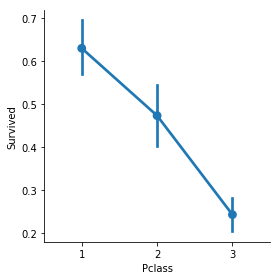

In [17]:
sns.factorplot(x='Pclass' , y='Survived', data = titanic_dframe)

## - survival per class and person 

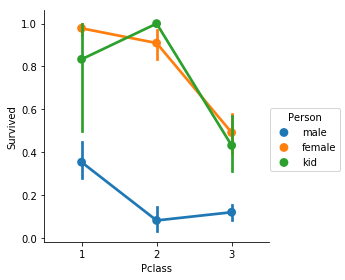

In [18]:
sns.factorplot(x='Pclass' , y='Survived', data = titanic_dframe, hue='Person')

## - survival per age

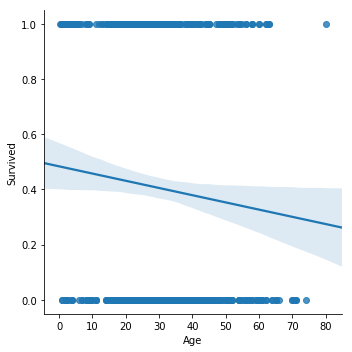

In [19]:
generations=[10,20,40,60,80]

sns.lmplot('Age', 'Survived', titanic_dframe)

## - survival per age per class

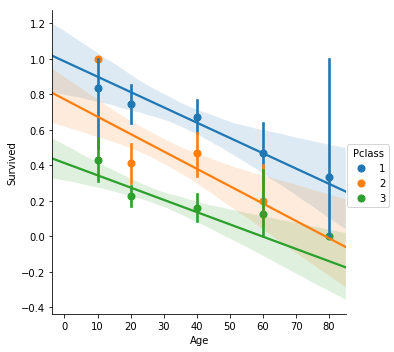

In [20]:
sns.lmplot('Age','Survived', titanic_dframe, hue='Pclass', x_bins=generations)

## - survival per age per sex

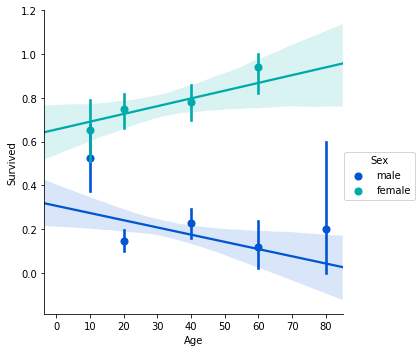

In [21]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_dframe,palette='winter',x_bins=generations)

## - survival per desc

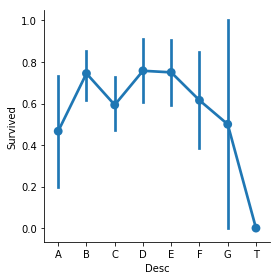

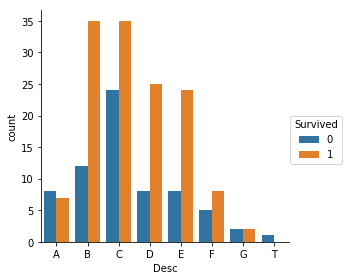

In [22]:
cabins_sur = titanic_dframe[['Survived','Desc', 'Person']]
cabins_sur.dropna()
cabins_sur = cabins_sur.sort_values(by = 'Desc')

sns.factorplot(x='Desc' , y='Survived', data = cabins_sur) 
sns.factorplot(x='Desc', data = cabins_sur, hue='Survived', kind='count') 

## - survival per family

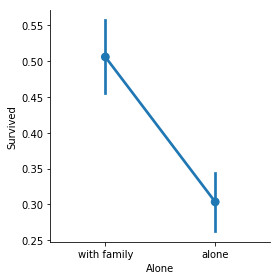

In [23]:
sns.factorplot(x='Alone' , y='Survived', data = titanic_dframe)